<a href="https://colab.research.google.com/github/bhatnagaraashish/QA-Test-Automation-Analytics/blob/main/QA_Test_Automation_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import random
from datetime import timedelta, datetime

# Parameters
num_entries = 120
statuses = ["Pass", "Fail", "Blocked", "Skipped"]
priorities = ["High", "Medium", "Low"]
modules = ["Login", "Payment", "Dashboard", "Reporting", "User Management"]

# Generate dataset
data = {
    "TestCaseID": range(1, num_entries+1),
    "TestCaseName": [f"Test Case {i}" for i in range(1, num_entries+1)],
    "Module": [random.choice(modules) for _ in range(num_entries)],
    "Status": [random.choices(statuses, weights=[0.6,0.2,0.1,0.1])[0] for _ in range(num_entries)],
    "Priority": [random.choice(priorities) for _ in range(num_entries)],
    "ExecutedBy": [f"Tester{random.randint(1,5)}" for _ in range(num_entries)],
    "ExecutionDate": [datetime(2025, 1, 1) + timedelta(days=random.randint(0, 119)) for _ in range(num_entries)]
}

df = pd.DataFrame(data)

# Save CSV
df.to_csv("QA_Test_Case_Automation_Reporting/data/mock_testcases.csv", index=False)
print(f"✅ Mock test cases saved with {num_entries} entries!")


✅ Mock test cases saved with 120 entries!


In [28]:
import pandas as pd

# Load the mock test cases data
df = pd.read_csv("QA_Test_Case_Automation_Reporting/data/mock_testcases.csv")

# Get and display the status summary
status_summary = summarize_status(df)
print("Test Case Status Summary:")
display(status_summary)

Test Case Status Summary:


,count
Status,
Pass,76
Fail,23
Skipped,12
Blocked,9


## Status Distribution

In [58]:
status_summary = df['Status'].value_counts().rename_axis('Status').reset_index(name='Count')
print("✅ Test Case Status Summary:")
display(status_summary)

✅ Test Case Status Summary:


,Status,Count
0,Pass,76
1,Fail,23
2,Skipped,12
3,Blocked,9


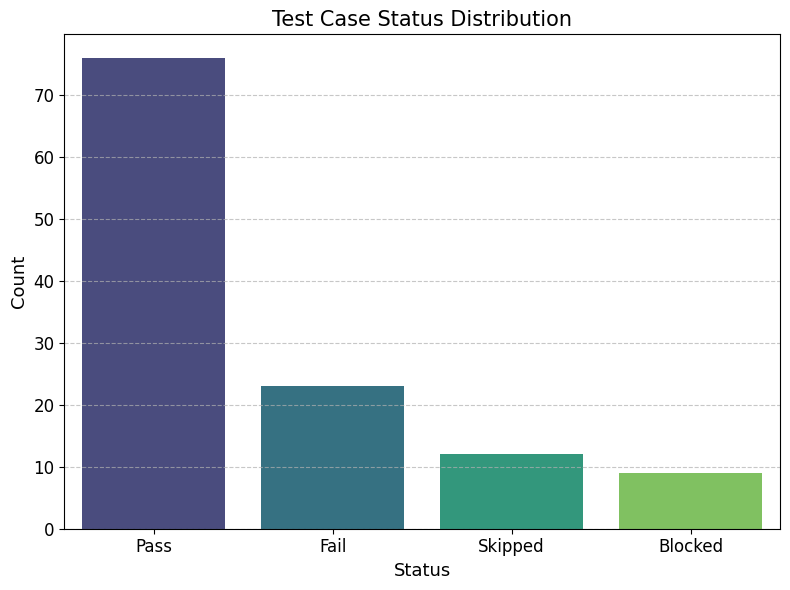

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

status_summary = df['Status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=status_summary.index, y=status_summary.values, palette='viridis', hue=status_summary.index, legend=False)
plt.title('Test Case Status Distribution', fontsize=15)
plt.xlabel('Status', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/status_distribution.png")
plt.show()

## Priority Distribution

In [59]:
priority_summary = df['Priority'].value_counts().rename_axis('Priority').reset_index(name='Count')
print("✅ Test Case Priority Summary:")
display(priority_summary)

✅ Test Case Priority Summary:


,Priority,Count
0,Low,45
1,High,42
2,Medium,33


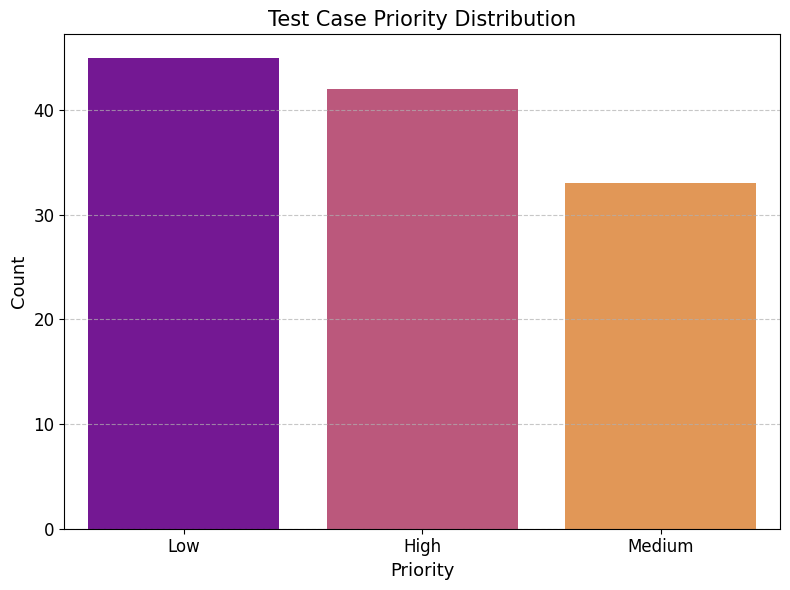

In [51]:
priority_summary = df['Priority'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=priority_summary.index, y=priority_summary.values, palette='plasma', hue=priority_summary.index, legend=False)
plt.title('Test Case Priority Distribution', fontsize=15)
plt.xlabel('Priority', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/priority_distribution.png")
plt.show()

## Tester-wise Execution Count

In [60]:
tester_counts = df['ExecutedBy'].value_counts().rename_axis('Tester').reset_index(name='TestCasesExecuted')
print("✅ Test Cases Executed by Each Tester:")
display(tester_counts)

✅ Test Cases Executed by Each Tester:


,Tester,TestCasesExecuted
0,Tester3,29
1,Tester1,26
2,Tester5,25
3,Tester2,22
4,Tester4,18


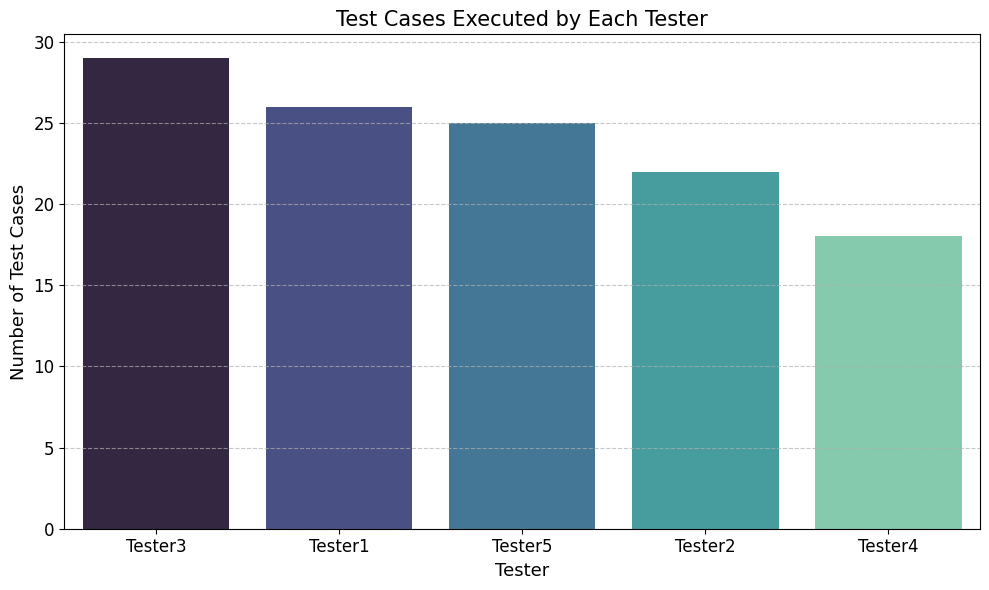

In [55]:
tester_counts = df['ExecutedBy'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=tester_counts.index, y=tester_counts.values, palette='mako', hue=tester_counts.index, legend=False)
plt.title('Test Cases Executed by Each Tester', fontsize=15)
plt.xlabel('Tester', fontsize=13)
plt.ylabel('Number of Test Cases', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/tester_count.png")
plt.show()

## Execution Trend Over Time

In [61]:
df['ExecutionDate'] = pd.to_datetime(df['ExecutionDate'])
execution_trend_data = df.groupby('ExecutionDate').size().rename('TestCasesExecuted').reset_index()
print("✅ Test Execution Trend Over Time:")
display(execution_trend_data)

✅ Test Execution Trend Over Time:


,ExecutionDate,TestCasesExecuted
0,2025-01-01,1
1,2025-01-02,1
2,2025-01-04,4
3,2025-01-06,1
4,2025-01-09,1
...,...,...
71,2025-04-26,2
72,2025-04-27,1
73,2025-04-28,1
74,2025-04-29,1


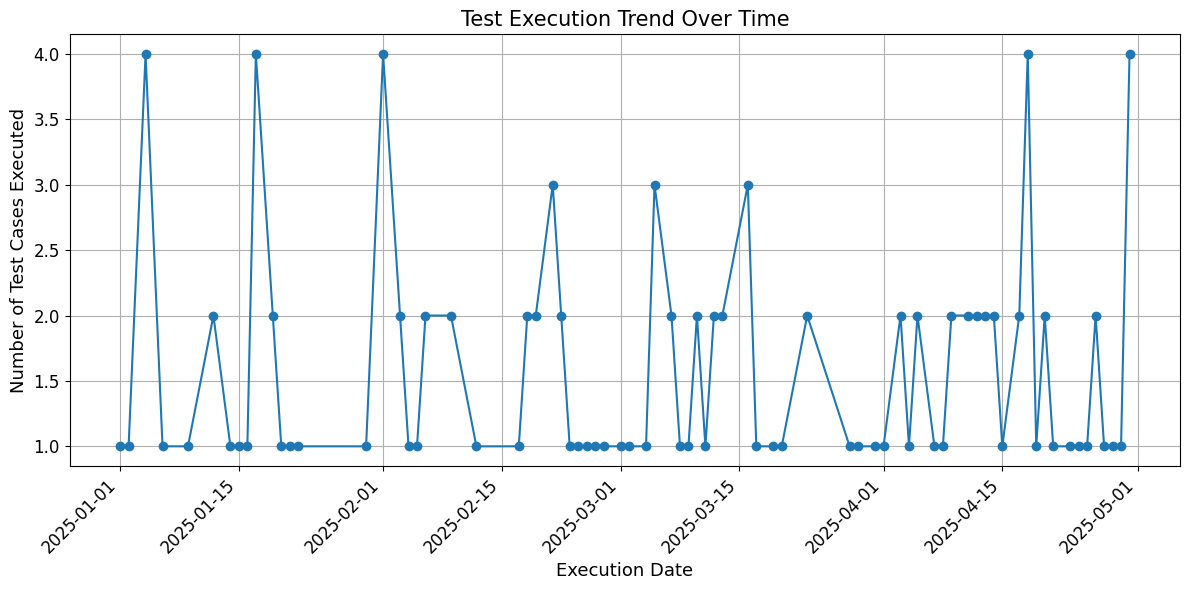

In [56]:
df['ExecutionDate'] = pd.to_datetime(df['ExecutionDate'])
execution_trend_data = df.groupby('ExecutionDate').size()

plt.figure(figsize=(12,6))
execution_trend_data.plot(kind='line', marker='o')
plt.title('Test Execution Trend Over Time', fontsize=15)
plt.xlabel('Execution Date', fontsize=13)
plt.ylabel('Number of Test Cases Executed', fontsize=13)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/execution_trend.png")
plt.show()


## Enhanced Analysis & Visualizations
### 1️⃣ Status & Priority Crosstab
**Show how test case statuses vary across priority levels.**

Status    Blocked  Fail  Pass  Skipped
Priority                              
High            5    11    24        2
Low             3     5    32        5
Medium          1     7    20        5


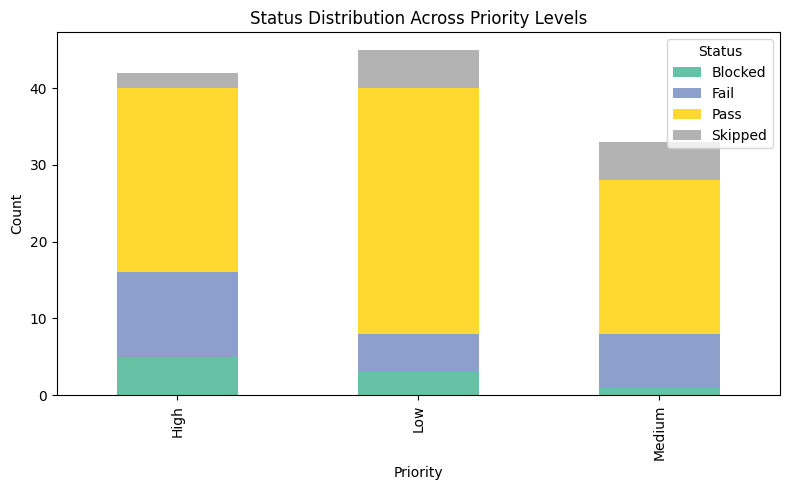

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

priority_status = pd.crosstab(df['Priority'], df['Status'])
print(priority_status)

# Create the directory if it doesn't exist
output_dir = "QA_Test_Case_Automation_Reporting/visualizations"
os.makedirs(output_dir, exist_ok=True)

# Stacked bar chart
priority_status.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title("Status Distribution Across Priority Levels")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "priority_status.png"))
plt.show()

###2️⃣ Module vs Priority Analysis
**Understand which modules have more high-priority or failing test cases.**

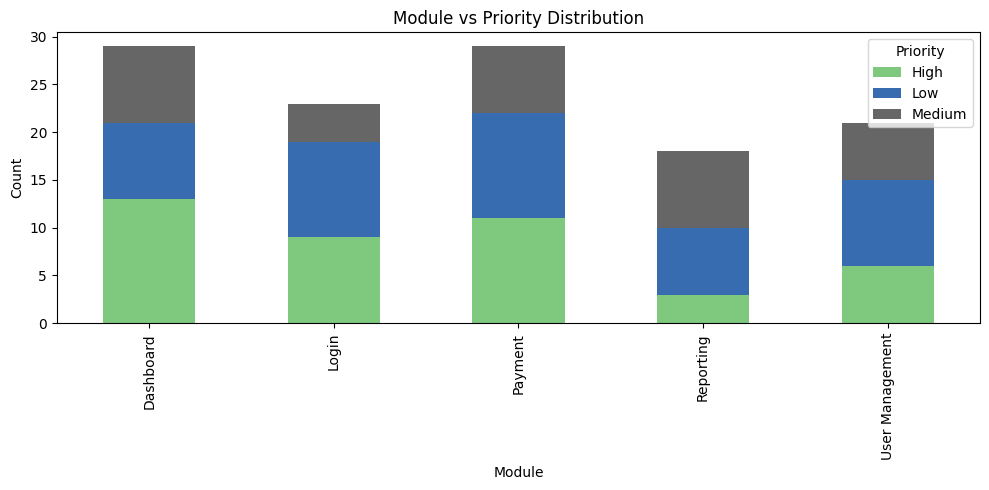

In [35]:
module_priority = pd.crosstab(df['Module'], df['Priority'])
module_priority.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Accent')
plt.title("Module vs Priority Distribution")
plt.xlabel("Module")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/module_priority.png")
plt.show()


### 3️⃣ Tester Performance Heatmap
**Visualize who executes which type of test case and success rates.**

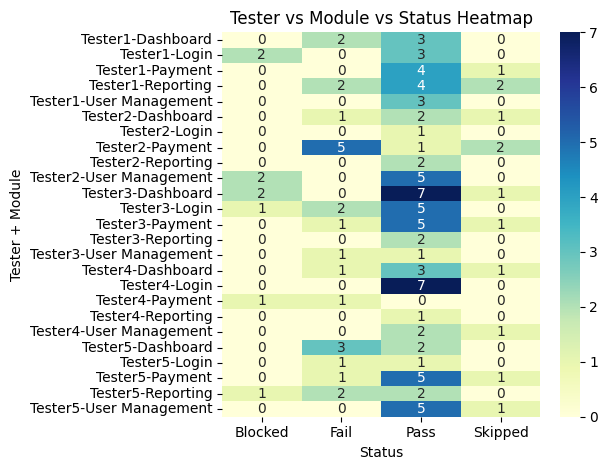

In [36]:
import seaborn as sns

tester_module_status = df.groupby(['ExecutedBy','Module'])['Status'].value_counts().unstack(fill_value=0)
sns.heatmap(tester_module_status, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Tester vs Module vs Status Heatmap")
plt.xlabel("Status")
plt.ylabel("Tester + Module")
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/tester_module_status_heatmap.png")
plt.show()


### 4️⃣ Execution Trends by Status Over Time
**Show how Pass, Fail, Blocked, Skipped evolve over time.**

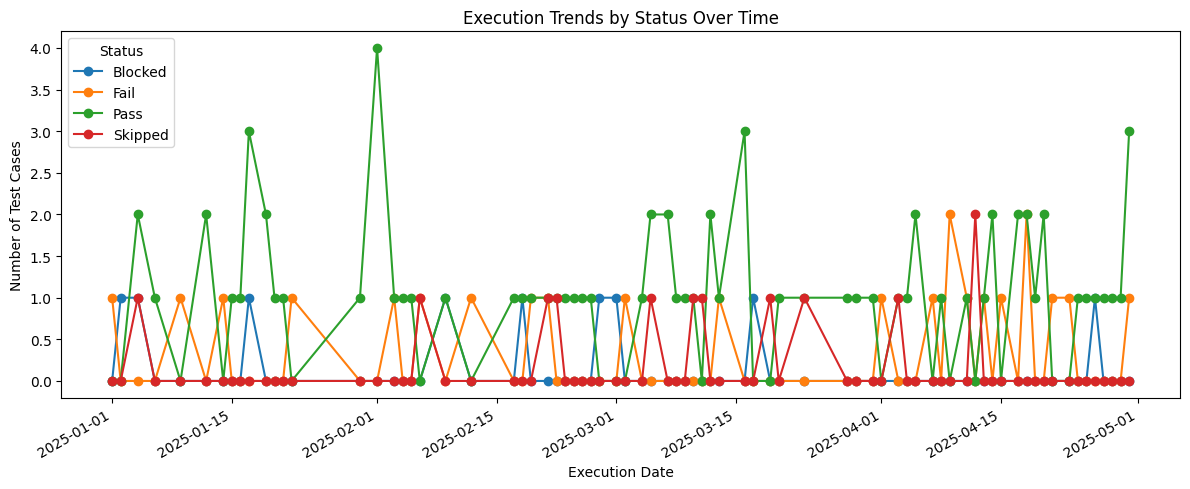

In [37]:
df['ExecutionDate'] = pd.to_datetime(df['ExecutionDate'])
trend_status = df.groupby(['ExecutionDate','Status']).size().unstack(fill_value=0)

trend_status.plot(kind='line', figsize=(12,5), marker='o')
plt.title("Execution Trends by Status Over Time")
plt.xlabel("Execution Date")
plt.ylabel("Number of Test Cases")
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/trend_status_over_time.png")
plt.show()


## 5️⃣ Pass Rate per Module
**Calculate % of passed tests per module for a performance overview.**


Status            PassRate
Module                    
Dashboard        58.620690
Login            73.913043
Payment          51.724138
Reporting        61.111111
User Management  76.190476


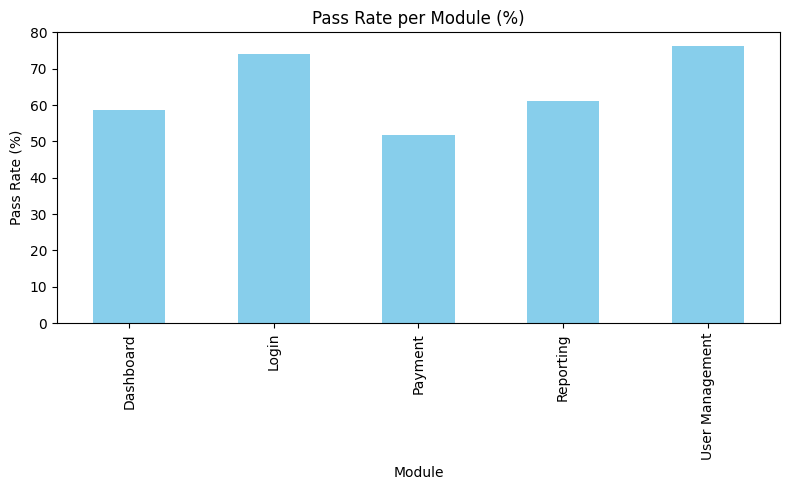

In [38]:
module_status_counts = df.groupby('Module')['Status'].value_counts(normalize=True).unstack(fill_value=0)
module_status_counts['PassRate'] = module_status_counts['Pass'] * 100
print(module_status_counts[['PassRate']])

# Bar chart of pass rate per module
module_status_counts['PassRate'].plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Pass Rate per Module (%)")
plt.ylabel("Pass Rate (%)")
plt.xlabel("Module")
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/pass_rate_per_module.png")
plt.show()


### 6️⃣ Priority-wise Failures
**Focus on high-risk areas: failing test cases by priority.**

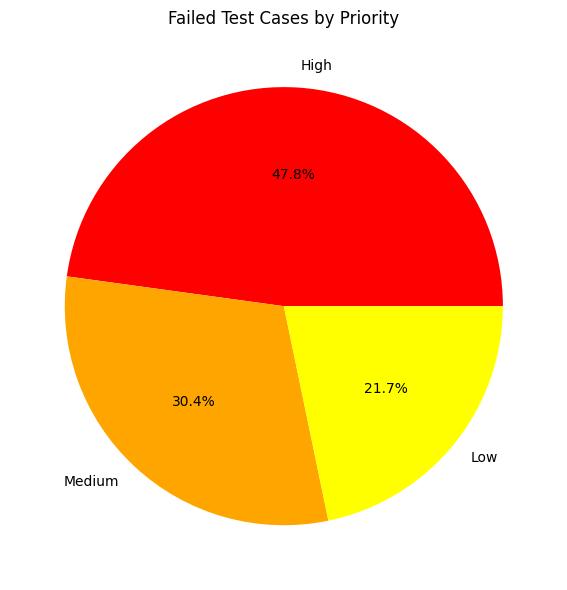

In [39]:
failures = df[df['Status']=='Fail']
failures_priority = failures['Priority'].value_counts()
failures_priority.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['red','orange','yellow'])
plt.title("Failed Test Cases by Priority")
plt.ylabel("")
plt.tight_layout()
plt.savefig("QA_Test_Case_Automation_Reporting/visualizations/failures_by_priority.png")
plt.show()


### 7️⃣ Summary Table
**Include key metrics like:**

In [40]:
summary_table = pd.DataFrame({
    "Total Test Cases": [len(df)],
    "Pass": [len(df[df['Status']=='Pass'])],
    "Fail": [len(df[df['Status']=='Fail'])],
    "Blocked": [len(df[df['Status']=='Blocked'])],
    "Skipped": [len(df[df['Status']=='Skipped'])],
    "High Priority": [len(df[df['Priority']=='High'])],
    "Medium Priority": [len(df[df['Priority']=='Medium'])],
    "Low Priority": [len(df[df['Priority']=='Low'])]
})
print(summary_table)


   Total Test Cases  Pass  Fail  Blocked  Skipped  High Priority  \
0               120    76    23        9       12             42   

   Medium Priority  Low Priority  
0               33            45  


## Overall Summary: QA Test Case Automation & Reporting
###Data Analysis Key Findings
**Status Overview**: Test cases were categorized into Pass, Fail, Blocked, and Skipped. This shows overall QA health and highlights problem areas.

**Priority Breakdown**: Test cases are distributed across priorities (High, Medium, Low), helping focus attention on high-risk scenarios.

**Module-wise Analysis**: Status breakdown per module (Dashboard, Login, Payment, Reporting, User Management) identifies modules with higher failure or blocked rates.

**Tester Performance**: The number of test cases executed by each tester was calculated, revealing workload distribution and potential bottlenecks.

**Execution Trend**: Daily execution counts plotted over time indicate testing patterns, spikes, and correlations with test outcomes.

**Priority vs Status (Stacked Bar)**: Highlights which priority test cases are failing most frequently.

**Pass Rate per Module**: Shows the proportion of successful tests per module, providing a quality metric.

**Failures by Priority**: Identifies high-priority test cases that fail most often, guiding remediation efforts.

###Insights & Next Steps
**Focus on High-Risk Areas**: Modules and priority levels with high failure or blocked rates should be prioritized for fixes and retesting.

**Optimize Tester Workload**: Balance execution assignments to reduce bottlenecks and improve efficiency.

**Execution Planning**: Use trend analysis to schedule testing cycles more effectively and identify potential rush periods.

**Enhanced Reporting**: Include pass rate, priority vs status, and failure breakdowns in dashboards for quicker decision-making by QA leads and management.

**Continuous Improvement**: Track metrics over multiple testing cycles to measure improvements and highlight persistent issues.